# US Accidents

Tujuan: Mengetahui pola kecelakaan di US serta faktor-faktor yang mungkin memengaruhi tingkat kecelakaannya

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
# Membaca dataset
df = pd.read_csv('...\\US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


## Handle Data Type

In [3]:
# Mengecek tipe data dan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
# Kolom severity menjadi target variabel
df['Severity'] = df['Severity'].astype('category')
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [5]:
# Kolom Start_Time dan End_Time diubah menjadi tipe data datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')
df[3639775:3639776]  # Menampilkan baris tertentu untuk verifikasi

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3639775,A-3649658,Source1,2,2017-07-23 04:21:01,2017-07-23 10:21:01,34.06265,-118.00068,34.06194,-118.0007,0.049,...,False,False,False,False,False,False,Night,Night,Night,Day


In [6]:
# Kolom Weather_Timestamp diubah menjadi datetime
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [7]:
# Kolom-kolom lain yang memiliki tipe data categorical
categorical_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               category      
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

## Handle Missing Data

In [9]:
# Mengecek jumlah nilai yang hilang pada setiap kolom
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
# Jumlah baris yang hilang dalam persen
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 0]

End_Lat                  44.029355
End_Lng                  44.029355
Description               0.000065
Street                    0.140637
City                      0.003274
Zipcode                   0.024779
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
dtype: float64

In [ ]:
# Drop kolom 'End_Lat' dan 'End_Lng'
df = df.drop(columns=['End_Lat', 'End_Lng'])

# Drop kolom untuk missing value di bawah 5%
threshold = 5
cols_to_dropna = missing_percentage[missing_percentage < threshold].index
df = df.dropna(subset=cols_to_dropna)

# # Untuk kolom kategori
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].cat.add_categories('Unknown').fillna('Unknown')

# Untuk kolom numerik
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

In [16]:
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7426729 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               category      
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

## Visualize Data

Start_Lat               Axes(0.125,0.653529;0.168478x0.226471)
Start_Lng            Axes(0.327174,0.653529;0.168478x0.226471)
Distance(mi)         Axes(0.529348,0.653529;0.168478x0.226471)
Temperature(F)       Axes(0.731522,0.653529;0.168478x0.226471)
Wind_Chill(F)           Axes(0.125,0.381765;0.168478x0.226471)
Humidity(%)          Axes(0.327174,0.381765;0.168478x0.226471)
Pressure(in)         Axes(0.529348,0.381765;0.168478x0.226471)
Visibility(mi)       Axes(0.731522,0.381765;0.168478x0.226471)
Wind_Speed(mph)             Axes(0.125,0.11;0.168478x0.226471)
Precipitation(in)        Axes(0.327174,0.11;0.168478x0.226471)
dtype: object

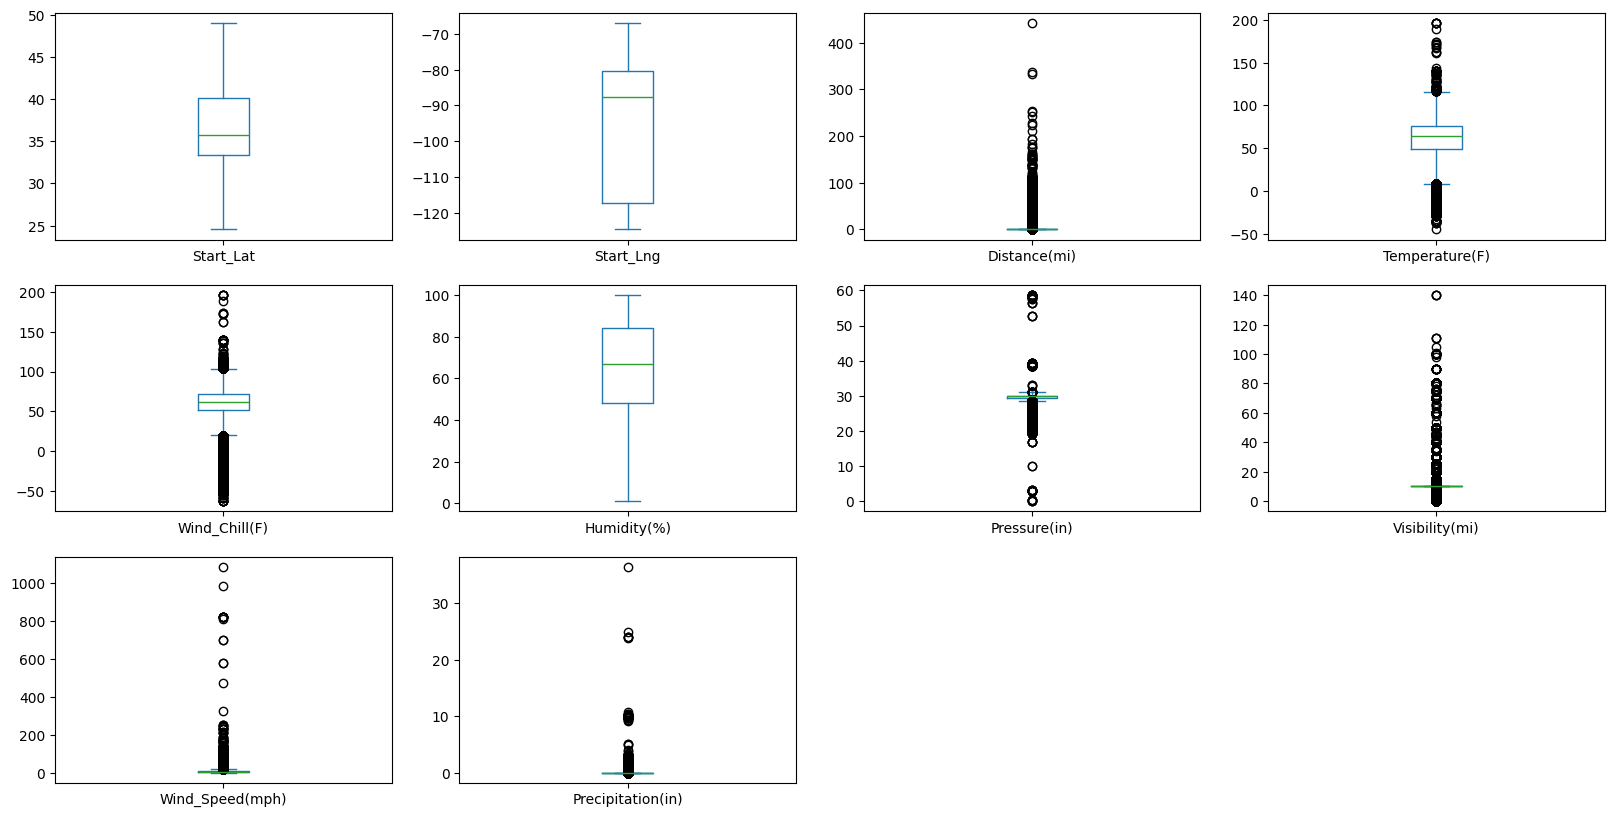

In [ ]:
# Distribusi variabel numerik
df.plot(kind='box', figsize=(20, 10), subplots=True, layout=(3, 4), sharex=False, sharey=False)

In [24]:
# Distribusi variabel kategorikal
df.select_dtypes(include='category').nunique()

Severity                 4
Sunrise_Sunset           2
Civil_Twilight           2
Nautical_Twilight        2
Astronomical_Twilight    2
dtype: int64

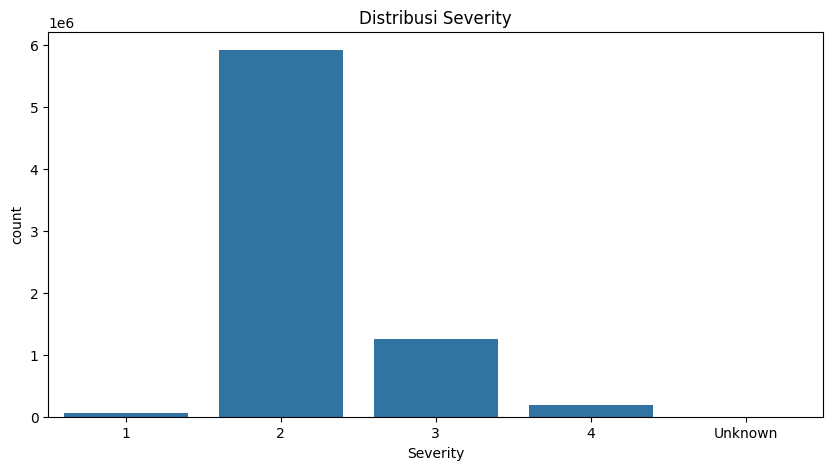

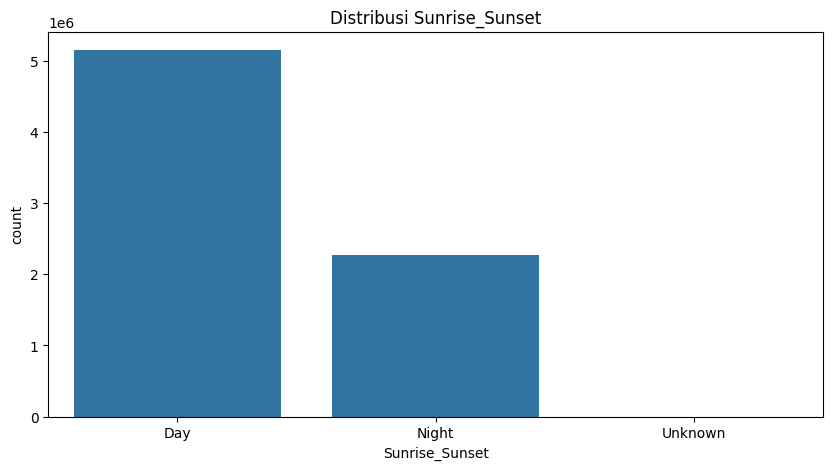

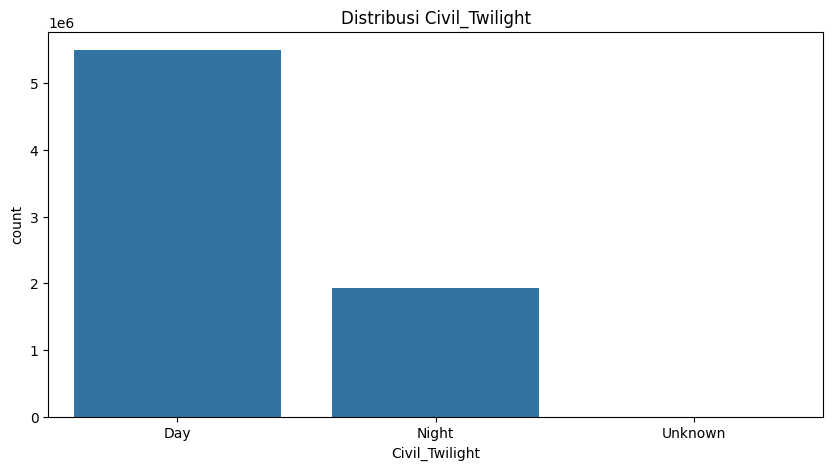

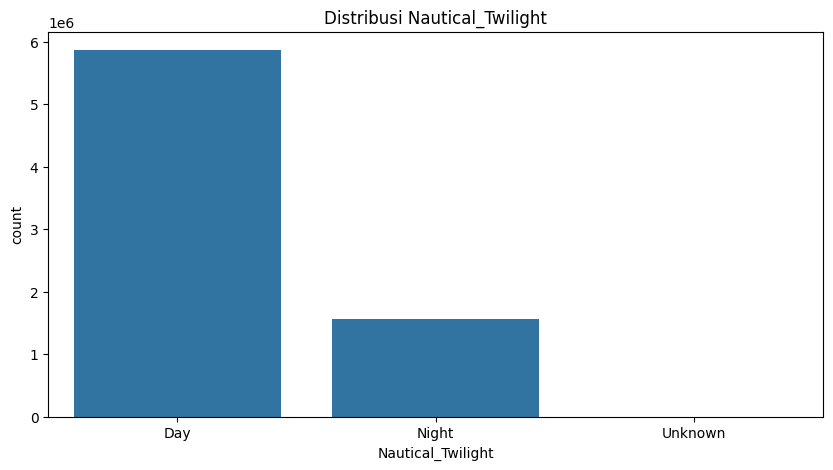

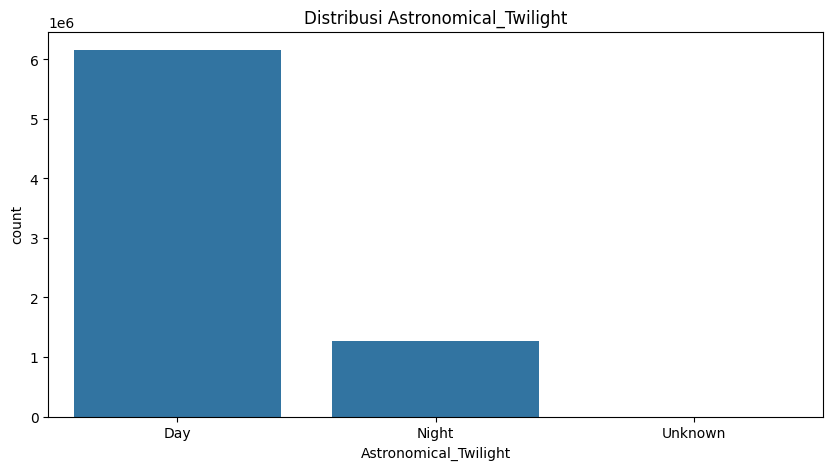

In [ ]:
# Distribusi variabel kategorikal
for col in df.select_dtypes(include='category').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.show()

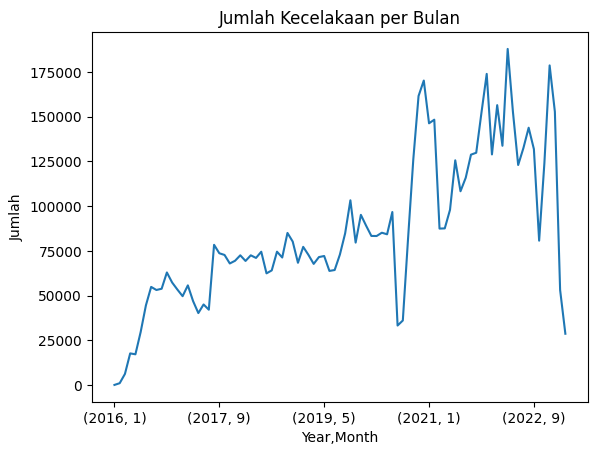

In [25]:
# Tren kecelakaan per bulan
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df.groupby(['Year', 'Month']).size().plot(kind='line')
plt.title('Jumlah Kecelakaan per Bulan')
plt.ylabel('Jumlah')
plt.show()

c:\Users\ACER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


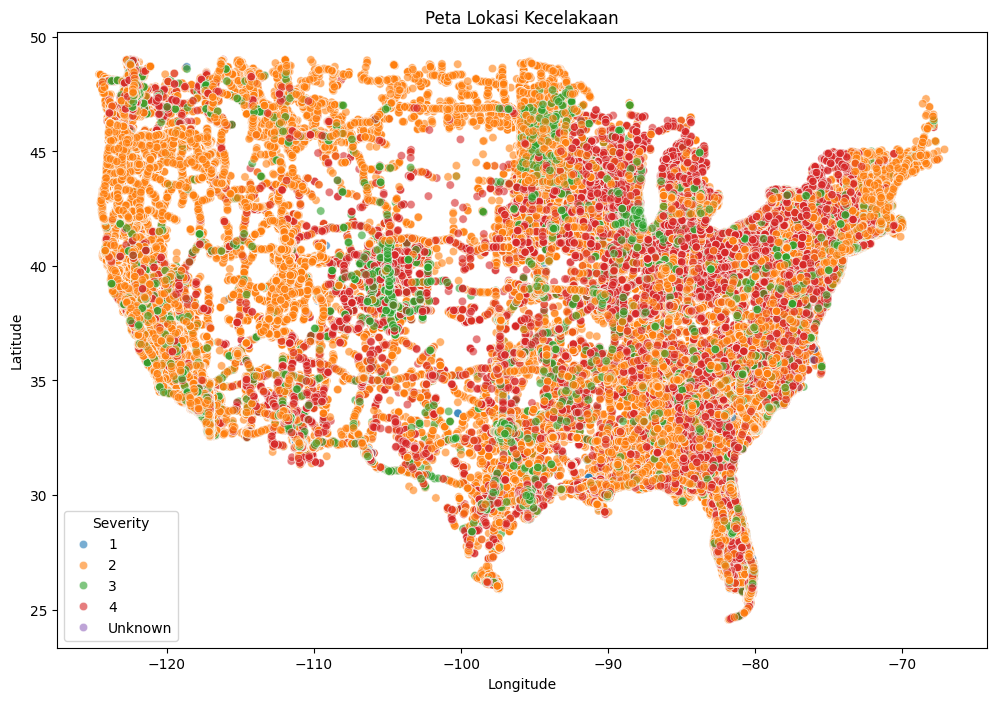

In [29]:
# Peta Lokasi Kecelakaan
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df, alpha=0.6)
plt.title('Peta Lokasi Kecelakaan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity')
plt.show()

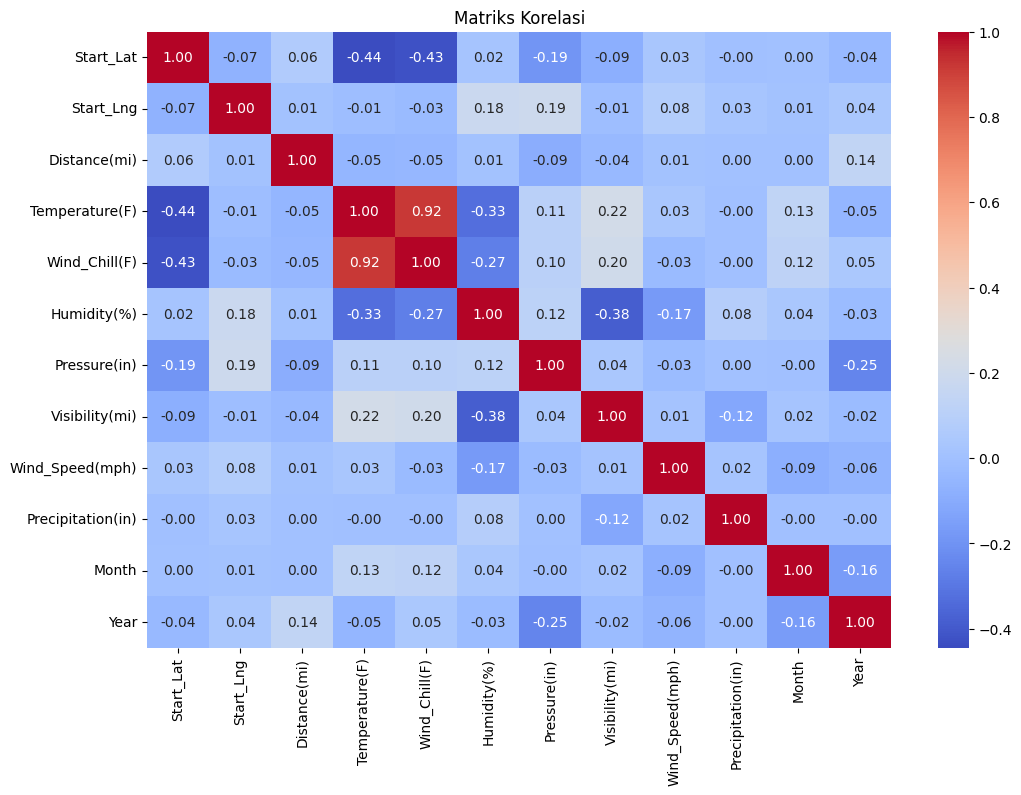

In [31]:
# Korelasi
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

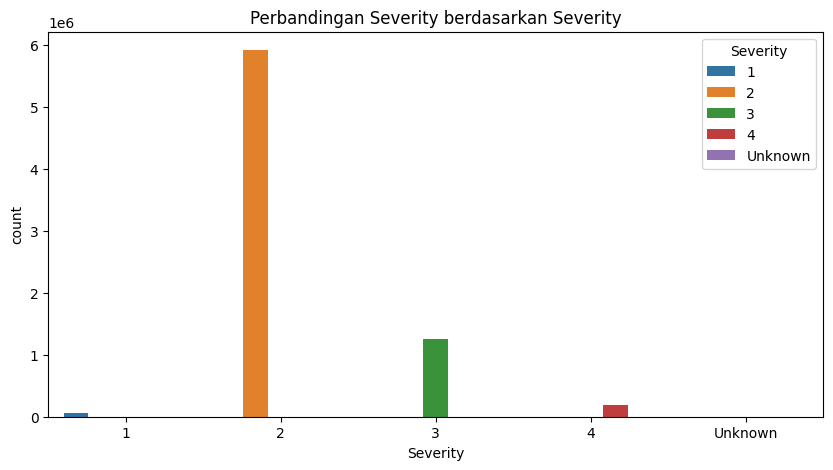

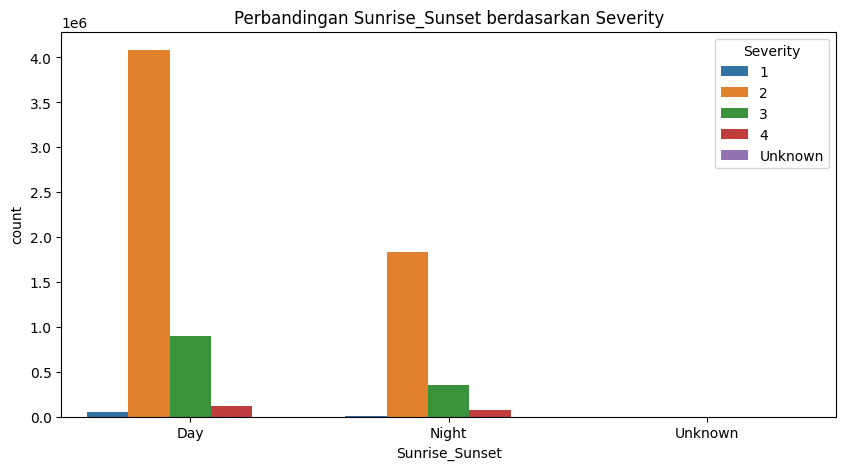

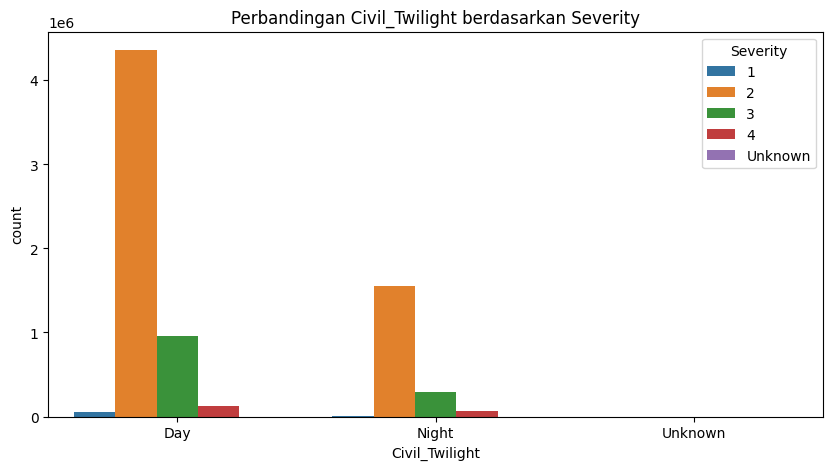

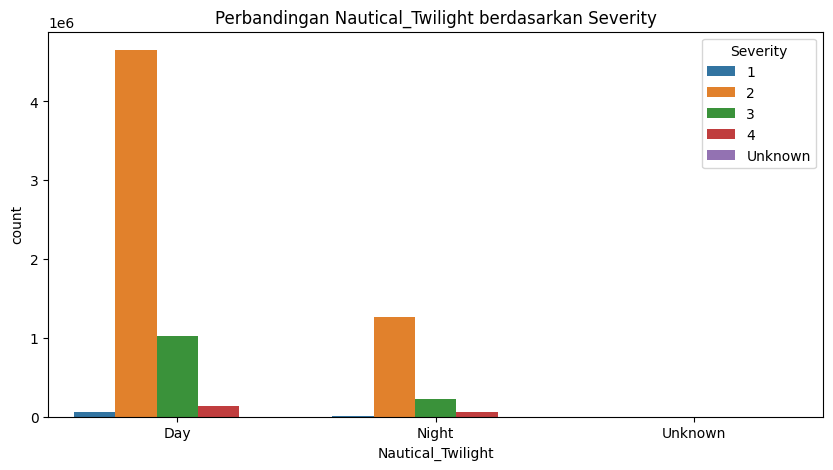

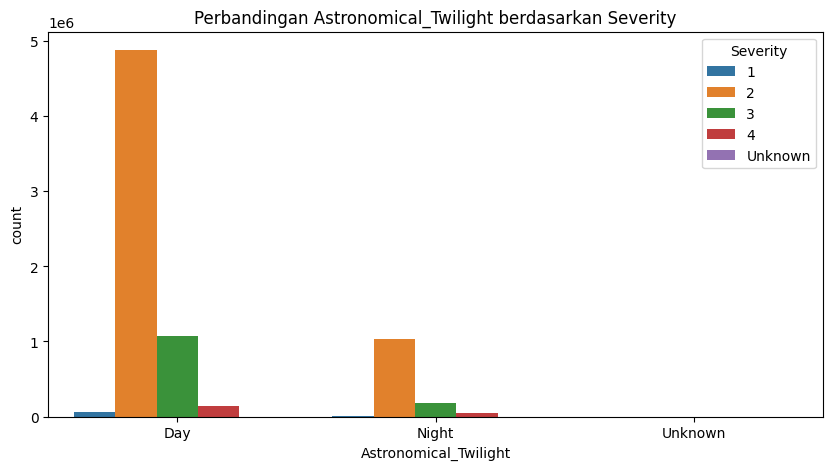

In [32]:
# Perbandingan antar kategori berdasarkan Severity
for col in df.select_dtypes(include='category').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Severity', data=df)
    plt.title(f'Perbandingan {col} berdasarkan Severity')
    plt.show()

## Insight dan Interpretasi

Tuliskan insight dari visualisasi yang telah dibuat.